## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
product_data = pd.read_csv('Products.csv')
product_data.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [10]:
customer_data = pd.read_csv('Customers.csv')
customer_data.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [11]:
transaction_data = pd.read_csv('Transactions.csv')
transaction_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [13]:
# Data Overview
print("Customers Data Info:")
print(customer_data.info())
print("\nProducts Data Info:")
print(product_data.info())
print("\nTransactions Data Info:")
print(transaction_data.info())

Customers Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None

Transactions Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    

In [16]:
customer_data.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [17]:
product_data.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [18]:
transaction_data.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [21]:
# Check for duplicates
print("\nDuplicate Records:")
print(f"Customers: {customer_data.duplicated().sum()}, Products: {product_data.duplicated().sum()}, Transactions: {transaction_data.duplicated().sum()}")



Duplicate Records:
Customers: 0, Products: 0, Transactions: 0


In [23]:
# Summary statistics
print("\nSummary Statistics - Transactions:")
print(transaction_data.describe())


Summary Statistics - Transactions:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [26]:
# Merging datasets for deeper analysis
df = transaction_data.merge(customer_data, on='CustomerID').merge(product_data, on='ProductID')
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


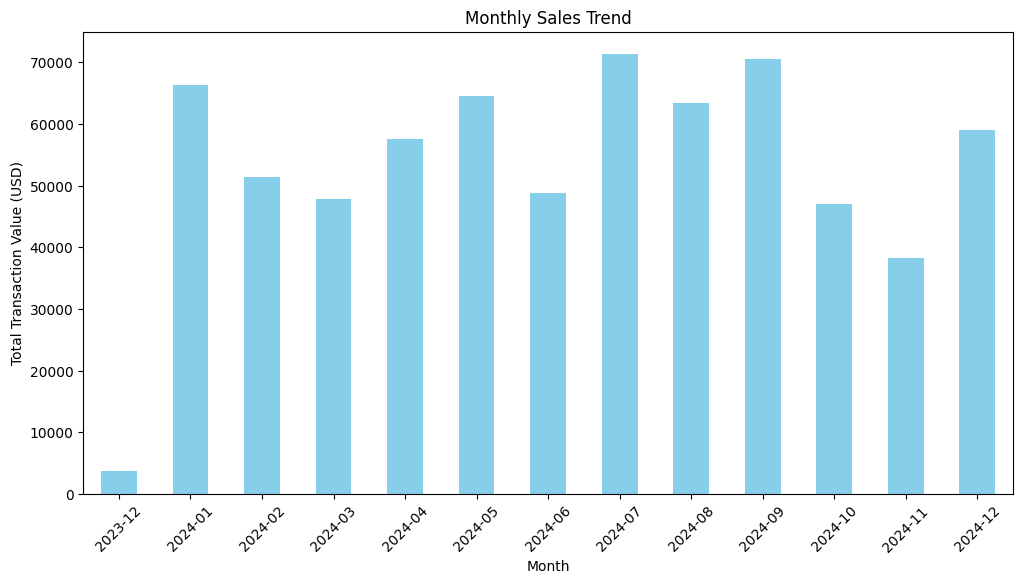

In [27]:
# Transactions over time
plt.figure(figsize=(12, 6))
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df.groupby(df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum().plot(kind='bar', color='skyblue')
plt.xlabel("Month")
plt.ylabel("Total Transaction Value (USD)")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()

C:\Users\Ojshav\AppData\Local\Temp\ipykernel_13852\778070376.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


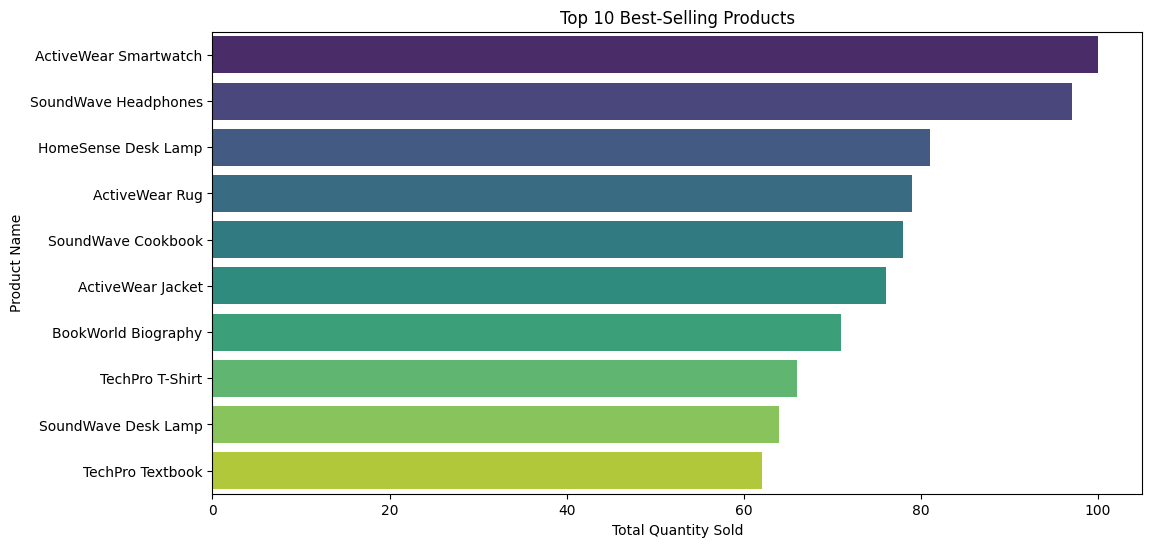

In [28]:
# Top-selling products
top_products = df.groupby('ProductName')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top 10 Best-Selling Products")
plt.show()


C:\Users\Ojshav\AppData\Local\Temp\ipykernel_13852\2629519756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Region'], order=df['Region'].value_counts().index, palette='coolwarm')


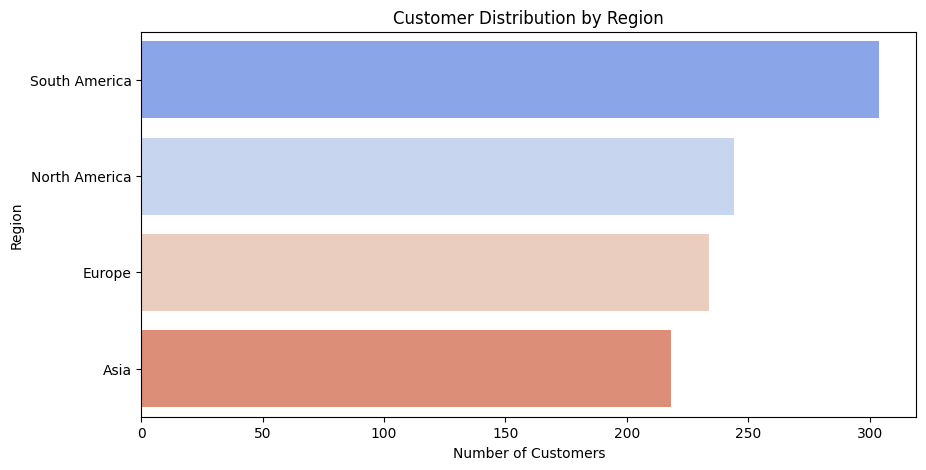

In [29]:
# Customer distribution by region
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Region'], order=df['Region'].value_counts().index, palette='coolwarm')
plt.xlabel("Number of Customers")
plt.ylabel("Region")
plt.title("Customer Distribution by Region")
plt.show()


C:\Users\Ojshav\AppData\Local\Temp\ipykernel_13852\1972380508.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='magma')


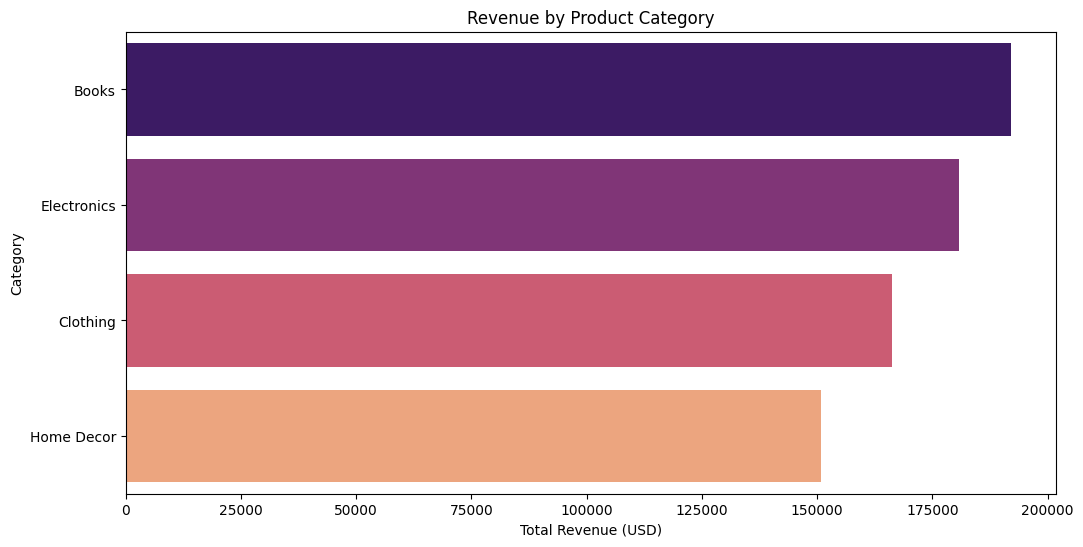

In [30]:
# Revenue by category
category_revenue = df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='magma')
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Category")
plt.title("Revenue by Product Category")
plt.show()

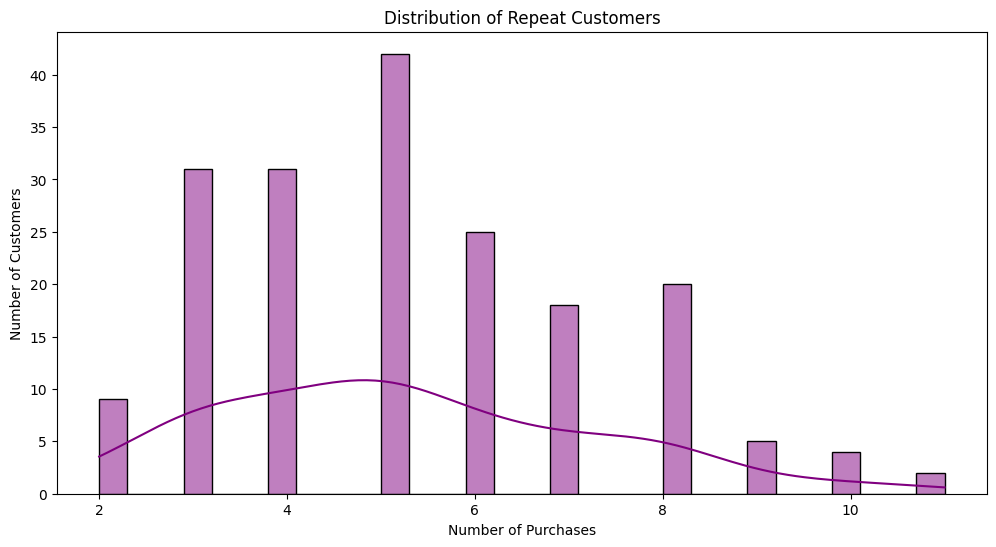

In [34]:
# Visualizing Repeat Customers
repeat_customers = df['CustomerID'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1]
plt.figure(figsize=(12, 6))
sns.histplot(repeat_customers, bins=30, kde=True, color='purple')
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.title("Distribution of Repeat Customers")
plt.show()

In [35]:
# Contribution of Repeat Customers to Total Sales
repeat_customers_df = df[df['CustomerID'].isin(repeat_customers.index)]
total_sales = df['TotalValue'].sum()
repeat_sales = repeat_customers_df['TotalValue'].sum()
repeat_sales_percentage = (repeat_sales / total_sales) * 100

print(f"\nRepeat customers contribute {repeat_sales_percentage:.2f}% of total sales.")


Repeat customers contribute 99.08% of total sales.


In [36]:
insights = [
    "1. Monthly sales trend analysis shows peak sales in specific months, indicating seasonal demand.",
    "2. The top 10 best-selling products account for a significant portion of total sales, suggesting a concentration of demand in a few key products., Electronics items like smartwatch and headphones nad furtiner iteams are the top most selling items.while books and electroces genrate genrate good revenure",
    "3. Customer distribution varies by region, with some regions having higher purchasing activity, guiding marketing strategies.",
    "4. The 'Electronics' and 'Books' categories generate the highest revenue, highlighting key business focus areas.",
    "5. Repeat customers contribute significantly to total sales, suggesting loyalty programs could enhance revenue."
]

print("\nBusiness Insights:")
for insight in insights:
    print(insight)



Business Insights:
1. Monthly sales trend analysis shows peak sales in specific months, indicating seasonal demand.
2. The top 10 best-selling products account for a significant portion of total sales, suggesting a concentration of demand in a few key products., Electronics items like smartwatch and headphones nad furtiner iteams are the top most selling items.while books and electroces genrate genrate good revenure
3. Customer distribution varies by region, with some regions having higher purchasing activity, guiding marketing strategies.
4. The 'Electronics' and 'Books' categories generate the highest revenue, highlighting key business focus areas.
5. Repeat customers contribute significantly to total sales, suggesting loyalty programs could enhance revenue.
